Some typical NumPy 'random' functions:

In [17]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.50659877 0.25298246]
 [0.02083268 0.61425964]
 [0.84948053 0.84500012]]
[-0.60250397 -0.74588173  0.66453261 -0.59549798  0.16233478]
[31  4 97 76 10 92 40 55 89 35]
[3 5 6]
[ 0.78182128  0.01752872 -1.07488564  0.32766239  0.55301809 -0.3208699
  1.95791418 -1.08543636  1.52505896  0.07699243]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [18]:

import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
pandas_data = pd.DataFrame({'random_data': np.random.randint(1, 101, size=1000000)})
end_time_pandas = time.time()
time_taken_pandas = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

faster_method = "NumPy" if time_taken_numpy < time_taken_pandas else "Pandas"

print(f"Pandas Time Taken: {time_taken_pandas} seconds")
print(f"NumPy Time Taken: {time_taken_numpy} seconds")
print(f"Faster Method: {faster_method}")



Pandas Time Taken: 0.015744924545288086 seconds
NumPy Time Taken: 0.005619049072265625 seconds
Faster Method: NumPy


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [19]:
import pandas as pd
import time

start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')

numeric_df = df.select_dtypes(include=[float, int])

mean_sleep_duration = df['Sleep Duration'].mean()
mean_systolic_bp = df['Systolic blood pressure'].mean()
mean_diastolic_bp = df['Diastolic blood pressure'].mean()
mean_heart_rate = df['Heart Rate'].mean()
mean_daily_steps = df['Daily Steps'].mean()

correlation_matrix = numeric_df.corr()

correlation_sleep_age = correlation_matrix.loc['Sleep Duration', 'Age']
correlation_sleep_heart_rate = correlation_matrix.loc['Sleep Duration', 'Heart Rate']
correlation_sleep_steps = correlation_matrix.loc['Sleep Duration', 'Daily Steps']

std_sleep_duration = df['Sleep Duration'].std()

end_time_pandas = time.time()
time_taken_pandas = end_time_pandas - start_time_pandas

pandas_results = {
    "Mean Sleep Duration": mean_sleep_duration,
    "Mean Systolic Blood Pressure": mean_systolic_bp,
    "Mean Diastolic Blood Pressure": mean_diastolic_bp,
    "Mean Heart Rate": mean_heart_rate,
    "Mean Daily Steps": mean_daily_steps,
    "Correlation Sleep Duration and Age": correlation_sleep_age,
    "Correlation Sleep Duration and Heart Rate": correlation_sleep_heart_rate,
    "Correlation Sleep Duration and Daily Steps": correlation_sleep_steps,
    "Standard Deviation of Sleep Duration": std_sleep_duration,
    "Time taken using Pandas": time_taken_pandas
}

print(pandas_results)

import numpy as np

start_time_numpy = time.time()

sleep_duration_np = df['Sleep Duration'].to_numpy()
systolic_bp_np = df['Systolic blood pressure'].to_numpy()
diastolic_bp_np = df['Diastolic blood pressure'].to_numpy()
heart_rate_np = df['Heart Rate'].to_numpy()
daily_steps_np = df['Daily Steps'].to_numpy()
age_np = df['Age'].to_numpy()

mean_sleep_duration_np = np.mean(sleep_duration_np)
mean_systolic_bp_np = np.mean(systolic_bp_np)
mean_diastolic_bp_np = np.mean(diastolic_bp_np)
mean_heart_rate_np = np.mean(heart_rate_np)
mean_daily_steps_np = np.mean(daily_steps_np)

correlation_matrix_np = np.corrcoef([sleep_duration_np, age_np, heart_rate_np, daily_steps_np])

correlation_sleep_age_np = correlation_matrix_np[0, 1]  
correlation_sleep_heart_rate_np = correlation_matrix_np[0, 2]  
correlation_sleep_steps_np = correlation_matrix_np[0, 3]  

std_sleep_duration_np = np.std(sleep_duration_np)

end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

numpy_results = {
    "Mean Sleep Duration": mean_sleep_duration_np,
    "Mean Systolic Blood Pressure": mean_systolic_bp_np,
    "Mean Diastolic Blood Pressure": mean_diastolic_bp_np,
    "Mean Heart Rate": mean_heart_rate_np,
    "Mean Daily Steps": mean_daily_steps_np,
    "Correlation Sleep Duration and Age": correlation_sleep_age_np,
    "Correlation Sleep Duration and Heart Rate": correlation_sleep_heart_rate_np,
    "Correlation Sleep Duration and Daily Steps": correlation_sleep_steps_np,
    "Standard Deviation of Sleep Duration": std_sleep_duration_np,
    "Time taken using NumPy": time_taken_numpy
}
print(numpy_results)


{'Mean Sleep Duration': np.float64(7.132085561497325), 'Mean Systolic Blood Pressure': np.float64(128.55347593582889), 'Mean Diastolic Blood Pressure': np.float64(84.64973262032086), 'Mean Heart Rate': np.float64(70.16577540106952), 'Mean Daily Steps': np.float64(6816.844919786096), 'Correlation Sleep Duration and Age': np.float64(0.3447093581647443), 'Correlation Sleep Duration and Heart Rate': np.float64(-0.516454888517144), 'Correlation Sleep Duration and Daily Steps': np.float64(-0.039532537675731685), 'Standard Deviation of Sleep Duration': np.float64(0.7956567308898189), 'Time taken using Pandas': 0.0041081905364990234}
{'Mean Sleep Duration': np.float64(7.132085561497325), 'Mean Systolic Blood Pressure': np.float64(128.55347593582889), 'Mean Diastolic Blood Pressure': np.float64(84.64973262032086), 'Mean Heart Rate': np.float64(70.16577540106952), 'Mean Daily Steps': np.float64(6816.844919786096), 'Correlation Sleep Duration and Age': np.float64(0.34470935816474385), 'Correlatio

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

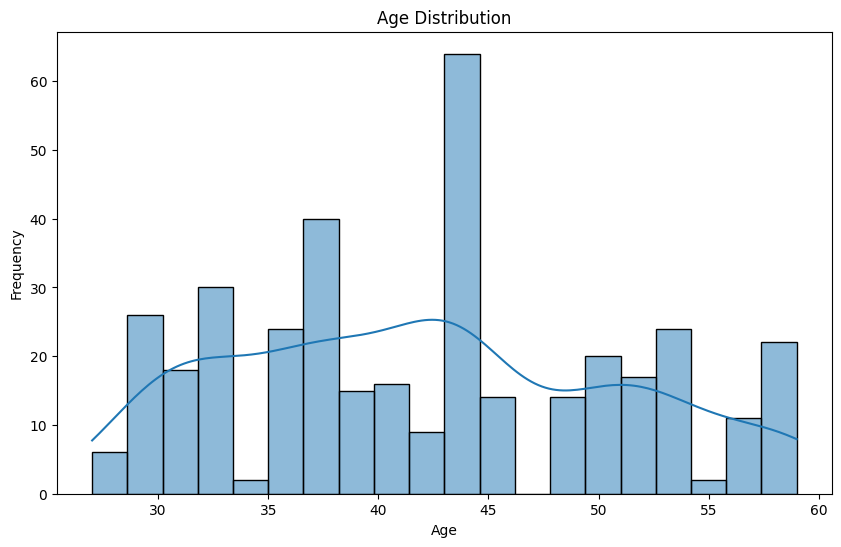

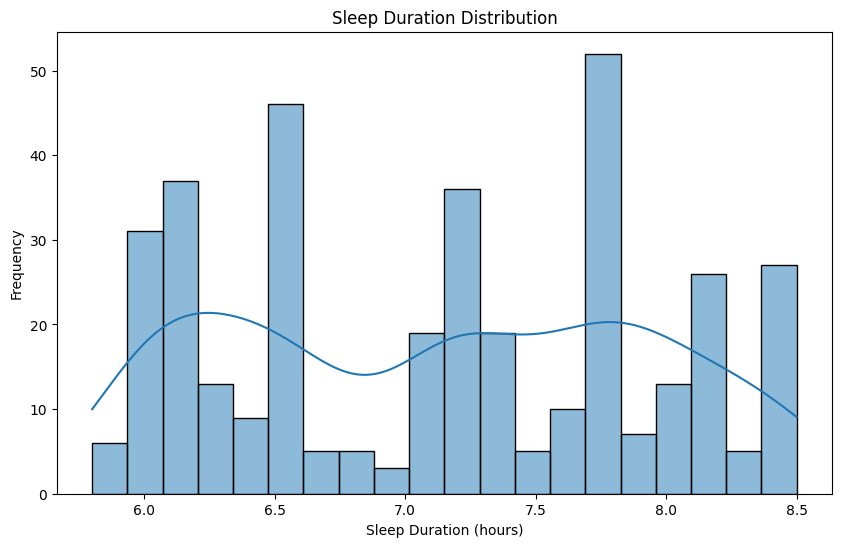

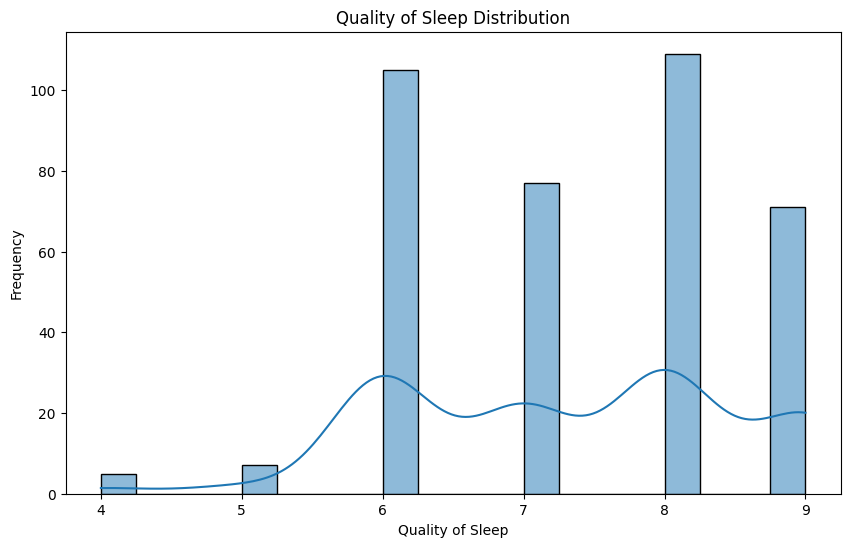

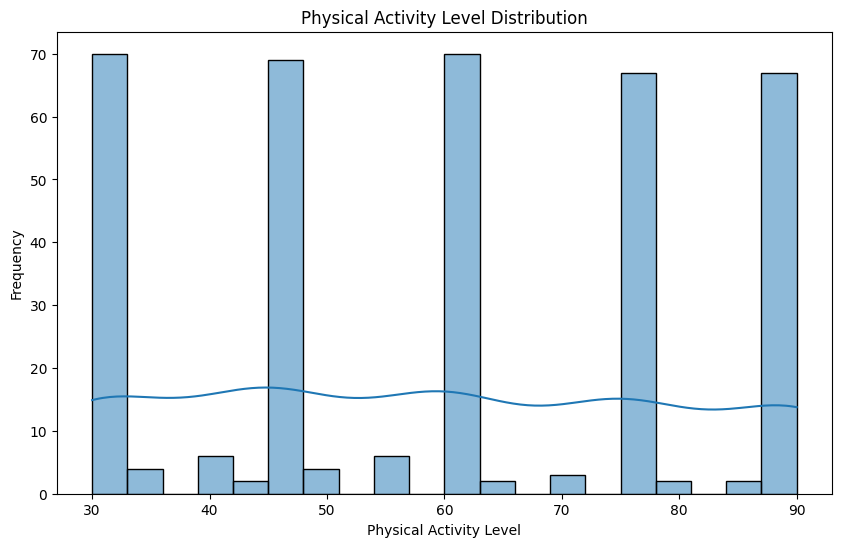

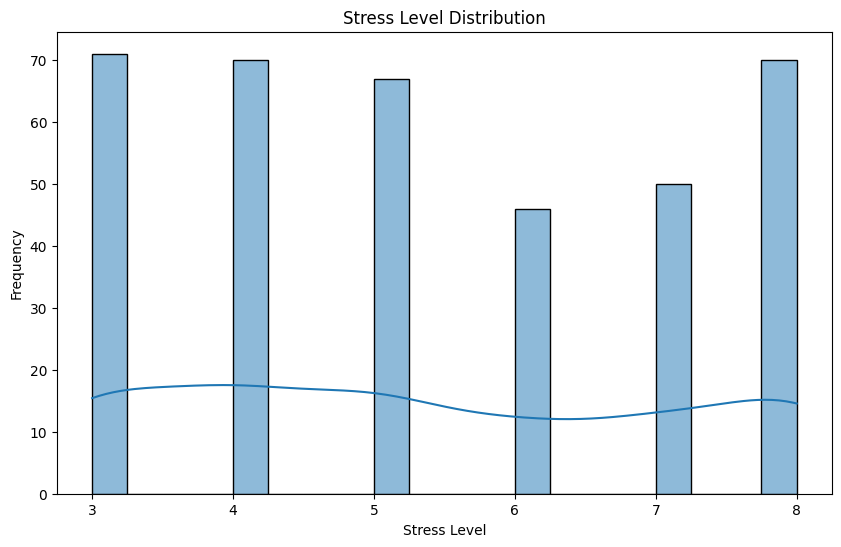

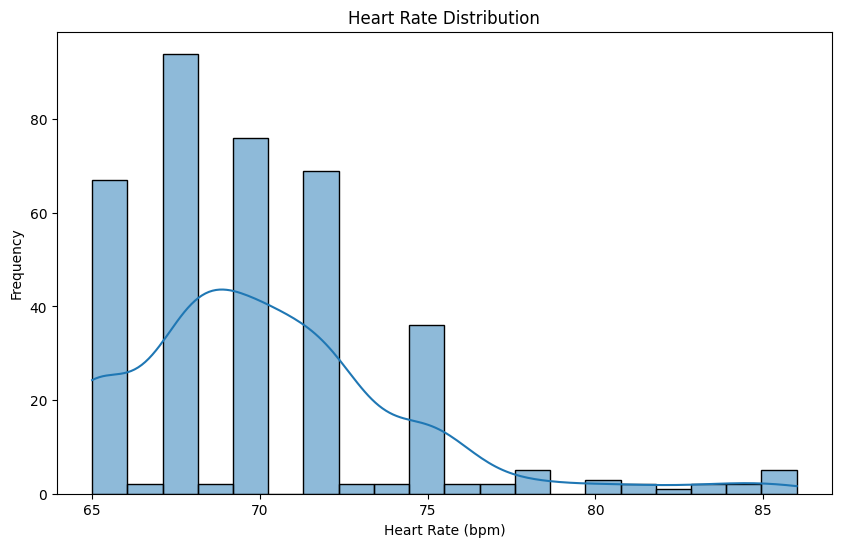

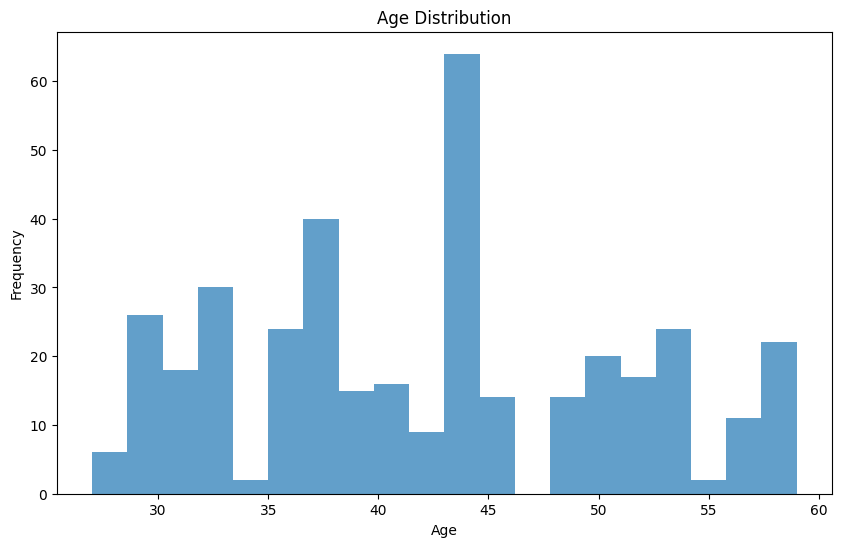

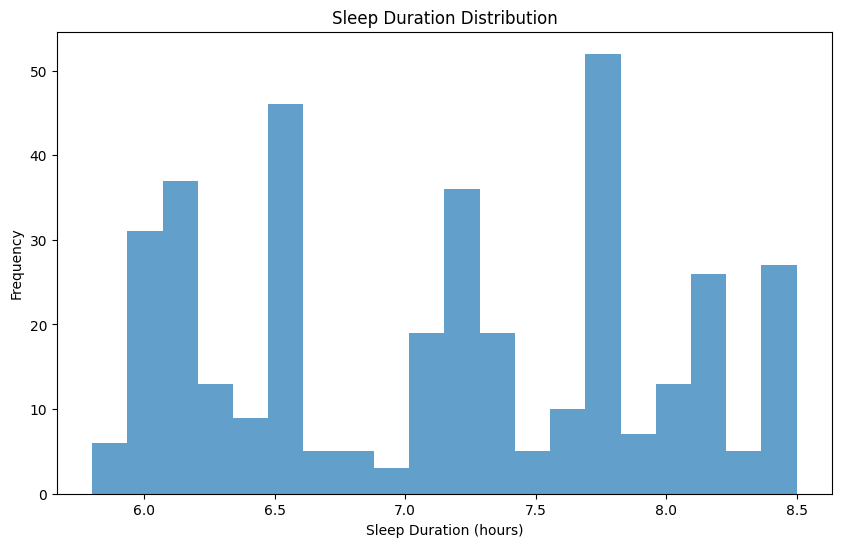

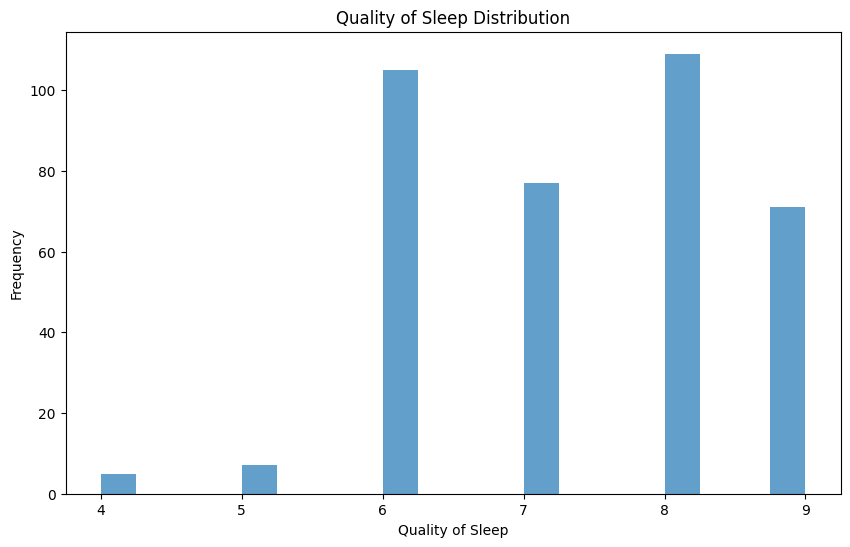

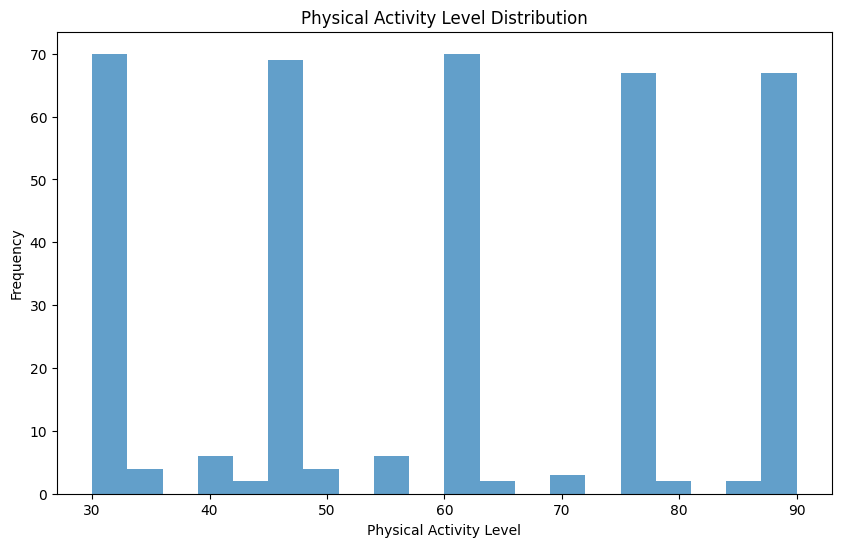

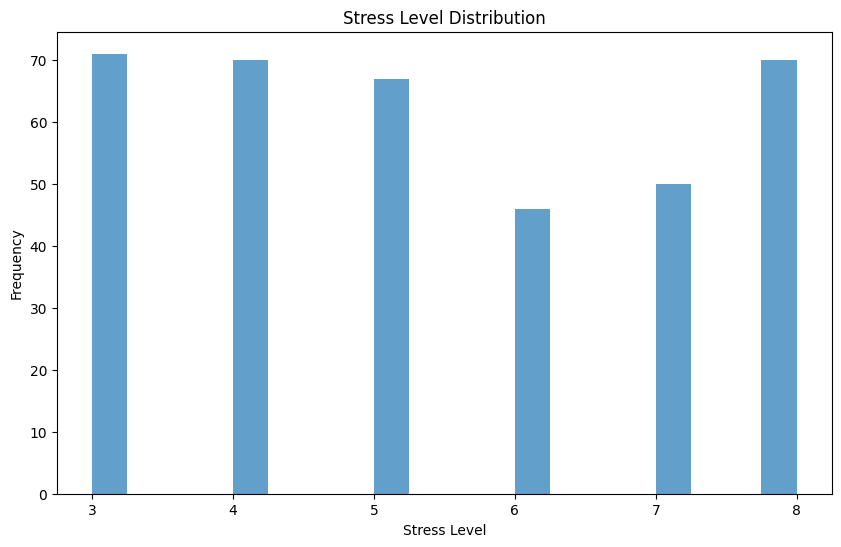

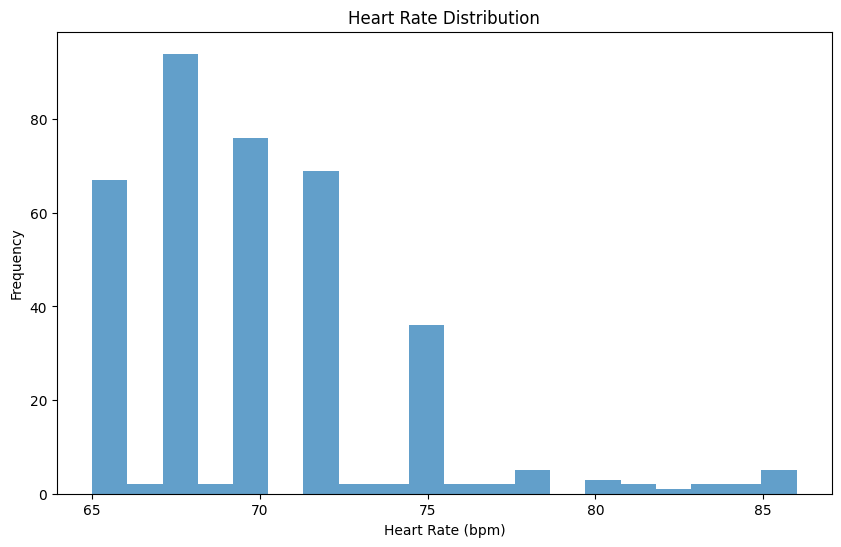

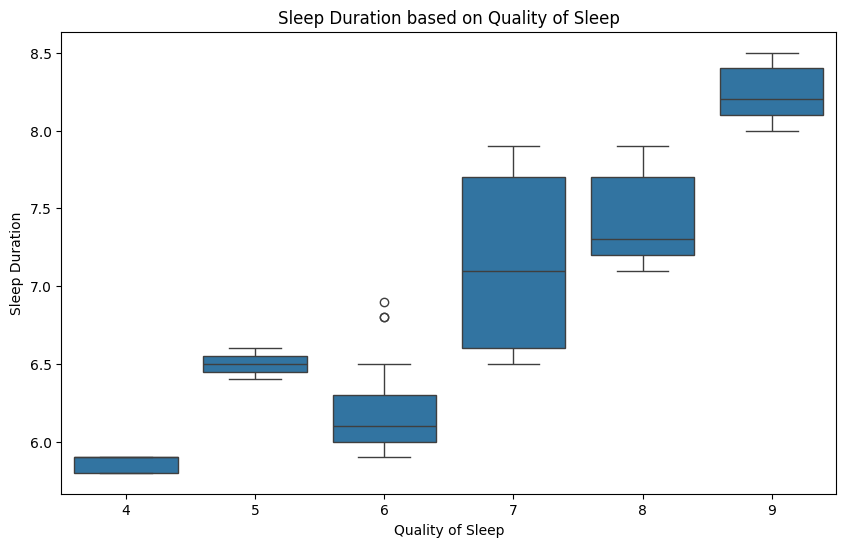

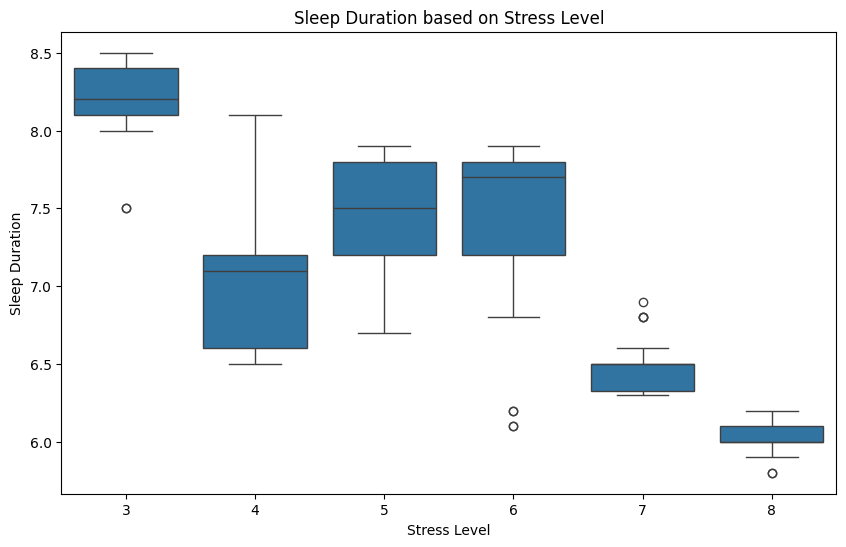

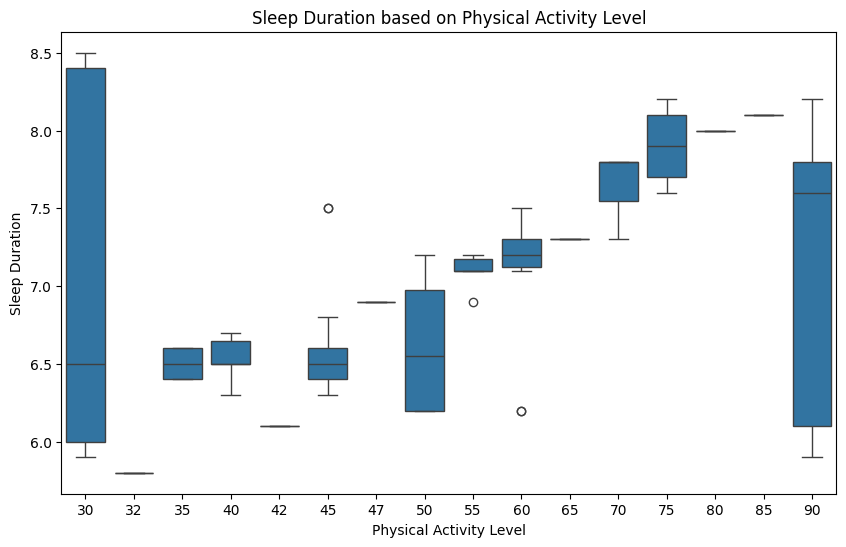

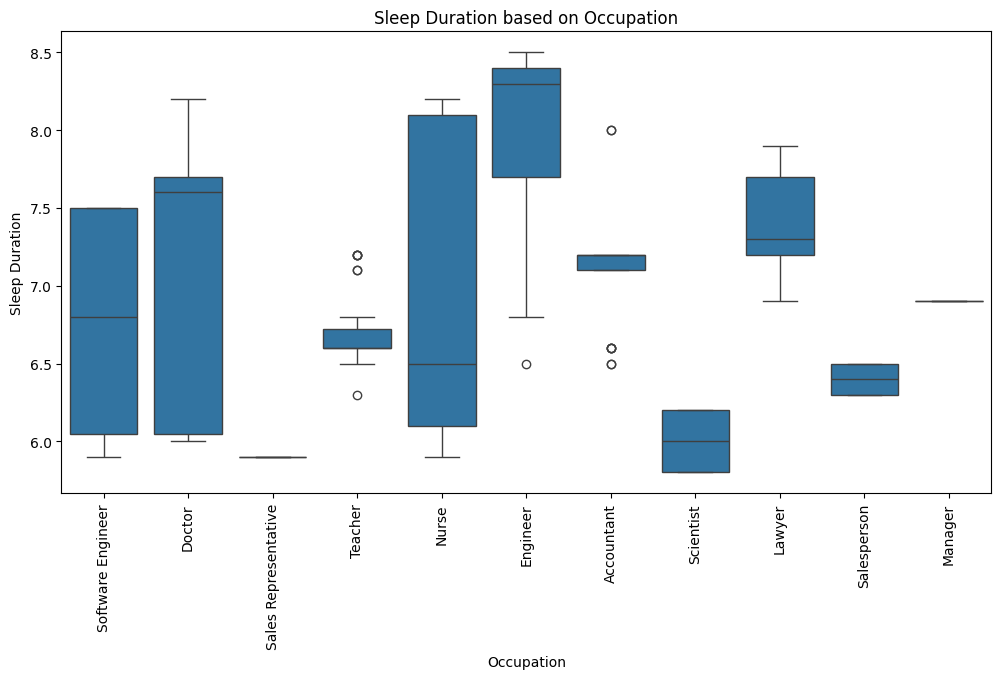

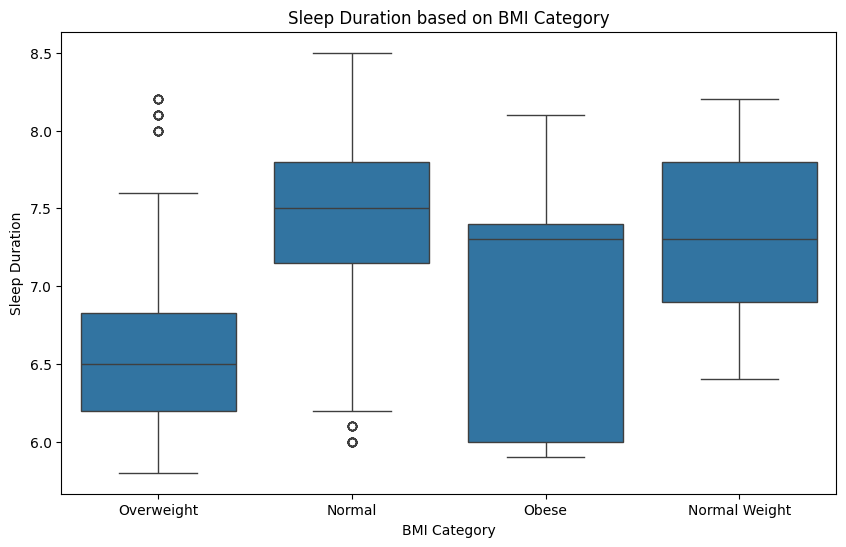

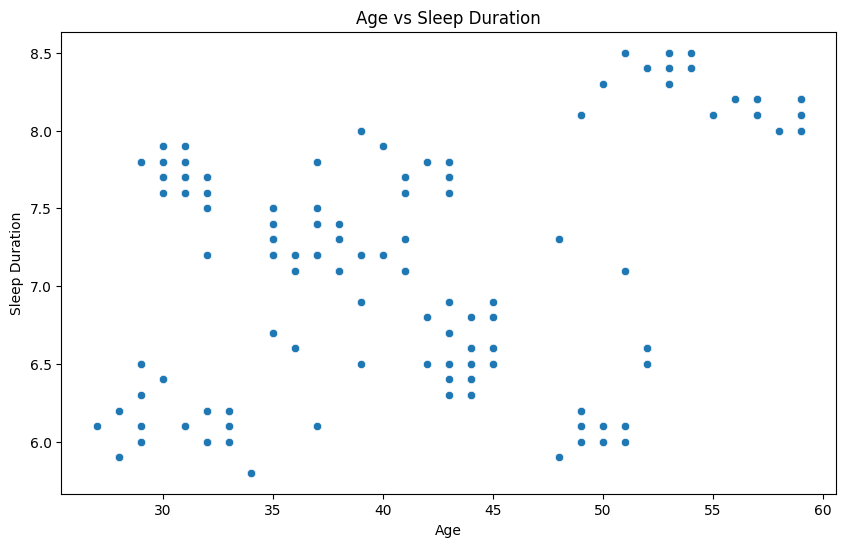

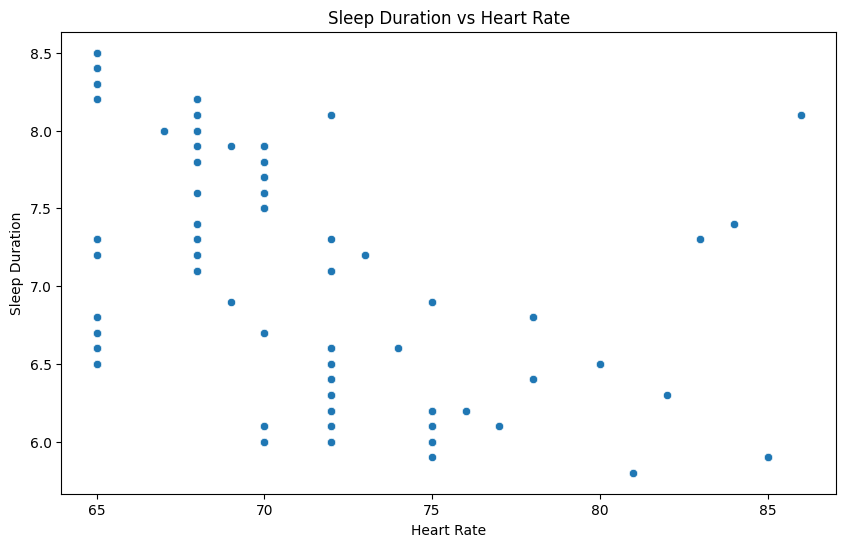

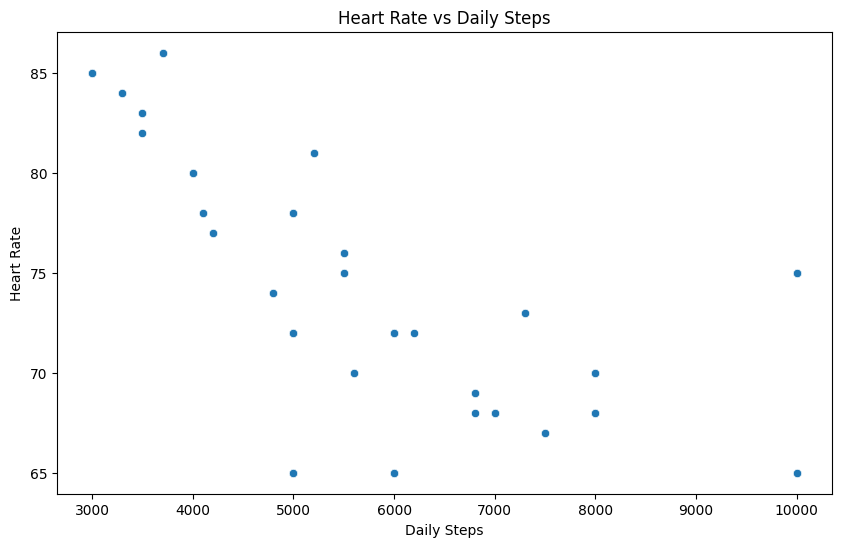

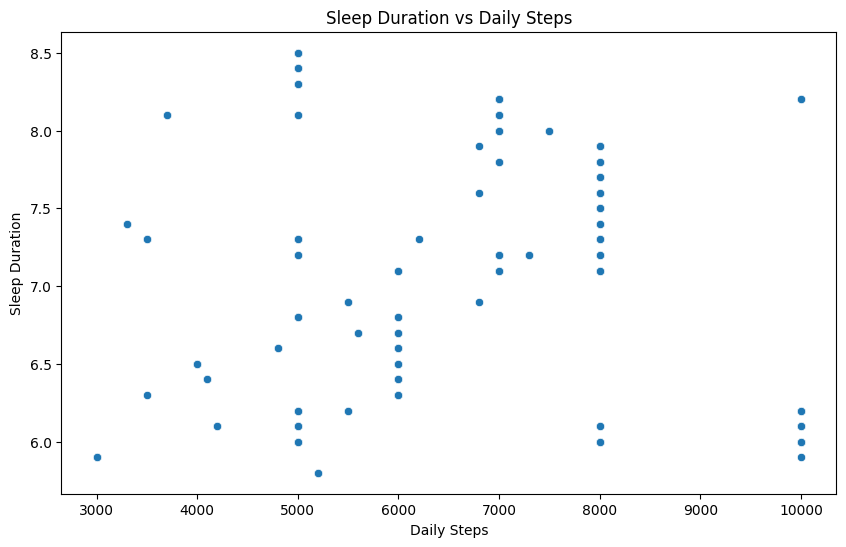

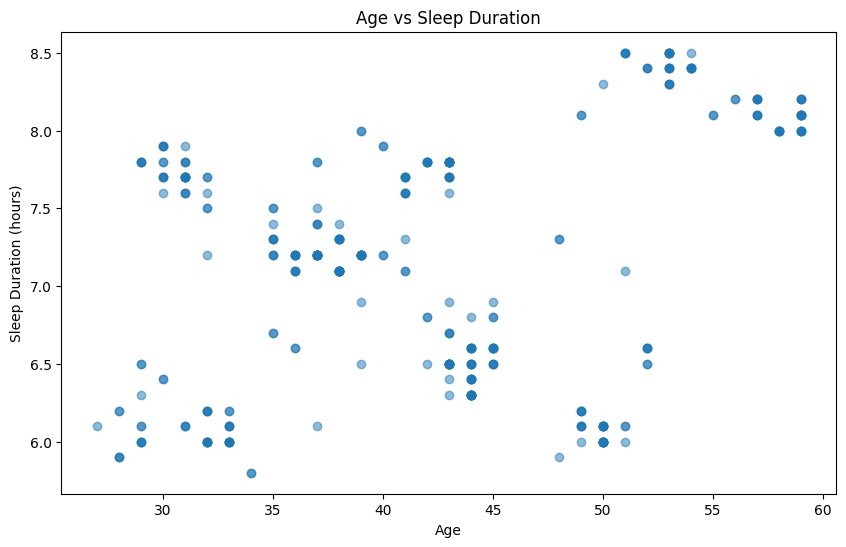

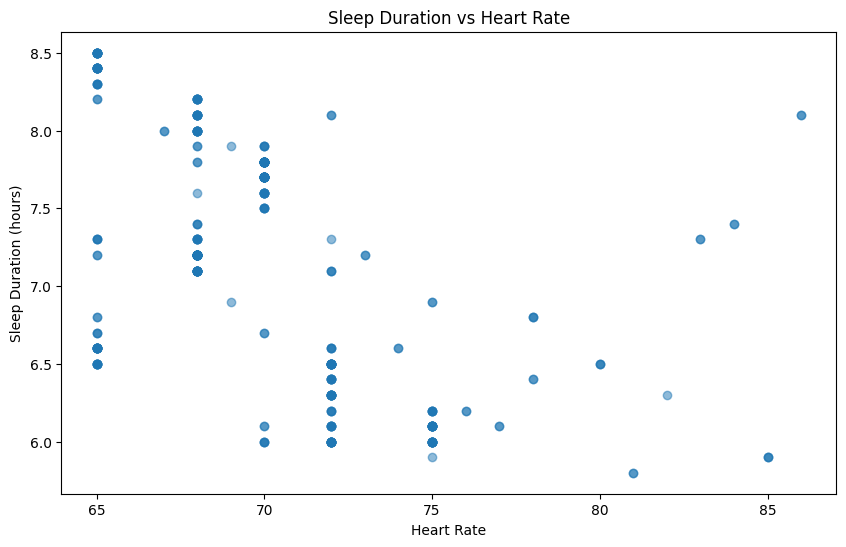

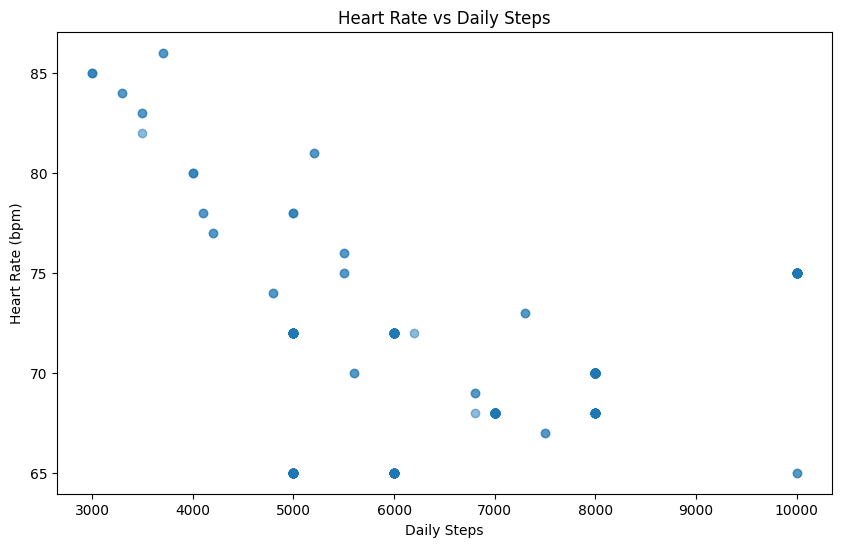

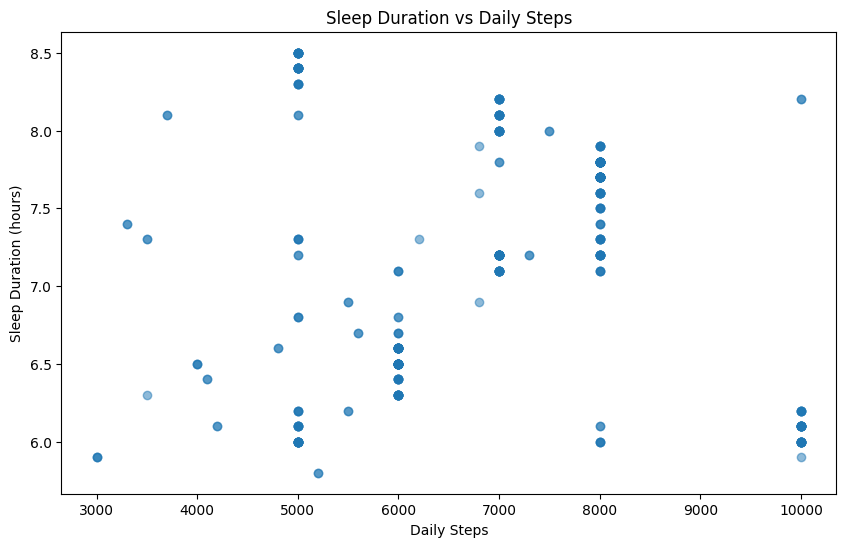

Time taken using Pandas: 0.0 seconds
Time taken using NumPy: 0.0 seconds


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sleep_health.csv') 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=20, kde=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], bins=20, kde=True)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], bins=20, kde=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=20, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

age_np = df['Age'].to_numpy()
sleep_duration_np = df['Sleep Duration'].to_numpy()
quality_of_sleep_np = df['Quality of Sleep'].to_numpy()
physical_activity_np = df['Physical Activity Level'].to_numpy()
stress_level_np = df['Stress Level'].to_numpy()
heart_rate_np = df['Heart Rate'].to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(age_np, bins=20, alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(sleep_duration_np, bins=20, alpha=0.7)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(quality_of_sleep_np, bins=20, alpha=0.7)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(physical_activity_np, bins=20, alpha=0.7)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(stress_level_np, bins=20, alpha=0.7)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(heart_rate_np, bins=20, alpha=0.7)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Quality of Sleep')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Stress Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Physical Activity Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.xticks(rotation=90)
plt.title('Sleep Duration based on Occupation')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on BMI Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Heart Rate', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(age_np, sleep_duration_np, alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(heart_rate_np, sleep_duration_np, alpha=0.5)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Duration (hours)')
plt.show()

daily_steps_np = df['Daily Steps'].to_numpy()
plt.figure(figsize=(10, 6))
plt.scatter(daily_steps_np, heart_rate_np, alpha=0.5)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(daily_steps_np, sleep_duration_np, alpha=0.5)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

import time

start_time_pandas = time.time()
end_time_pandas = time.time()
time_taken_pandas = end_time_pandas - start_time_pandas

start_time_numpy = time.time()
end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

print(f"Time taken using Pandas: {time_taken_pandas} seconds")
print(f"Time taken using NumPy: {time_taken_numpy} seconds")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



1. Heatmap
By showing the correlation between all numerical variables through heat maps, the strong and weak correlation between variables can be quickly identified. For example, the correlation between sleep duration and variables such as age and heart rate is clear.
2. Bubble Plot
Bubble plots can be used to visualize data in three dimensions, using the size of the bubble to represent the third variable. For example, using age and sleep duration as coordinates, bubble size represents heart rate.